In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from itertools import combinations_with_replacement

In [2]:
# Load datasets
X = pd.read_csv("/content/hw2-ID-X.csv", header=None).values  # State variables
X_prime = pd.read_csv("/content/hw2-ID-Xprime.csv", header=None).values  # Time derivatives

In [3]:
# Function to construct a feature library (polynomial terms)
def polynomial_features(X, degree=3):
    n_samples, n_features = X.shape
    feature_list = [np.ones(n_samples)]  # Constant term
    feature_names = ["1"]  # Corresponding name for constant term

    # Generate polynomial combinations of features
    for d in range(1, degree + 1):
        for terms in combinations_with_replacement(range(n_features), d):
            feature_list.append(np.prod(X[:, terms], axis=1))
            feature_names.append("*".join([f"x{t+1}" for t in terms]))

    return np.column_stack(feature_list), feature_names

In [4]:
# Generate polynomial feature library
Theta_X, feature_names = polynomial_features(X, degree=3)

In [5]:
# Perform sparse regression using Lasso to identify governing equations
lasso = Lasso(alpha=0.01, fit_intercept=False)
lasso.fit(Theta_X, X_prime)

Lasso(alpha=0.01, fit_intercept=False)

In [6]:
# Extract coefficients
coef_matrix = lasso.coef_.T  # Transpose for correct indexing

In [7]:
# Perform sparse regression and print equations
print("Identified Governing Equations:")
for i in range(X.shape[1]):
    # Fit Lasso for each target variable separately
    lasso = Lasso(alpha=0.01, fit_intercept=False)
    lasso.fit(Theta_X, X_prime[:, i])

    # Extract coefficients for the current target variable
    coef_matrix_i = lasso.coef_

    terms = [f"{coef_matrix_i[j]:.4f} * {feature_names[j]}" for j in range(len(feature_names)) if abs(coef_matrix_i[j]) > 1e-3]
    equation = " + ".join(terms)
    print(f"x{i+1}' = {equation}")

Identified Governing Equations:
x1' = 0.8557 * 1 + 1.0109 * x1 + -0.0779 * x2 + -0.0068 * x1*x2
x2' = 1.0164 * 1 + -0.1565 * x1 + -0.9008 * x2 + 0.0034 * x1*x1 + 0.0151 * x1*x2


In [10]:
# Code to simulate the differential equation system

(5000, 2)
(5000, 2)
Identified coefficients: [[-0.00692208 -0.505439  ]
 [ 2.01384319  0.01087789]]
Intercept (bias term): [  51.42791954 -102.85580628]


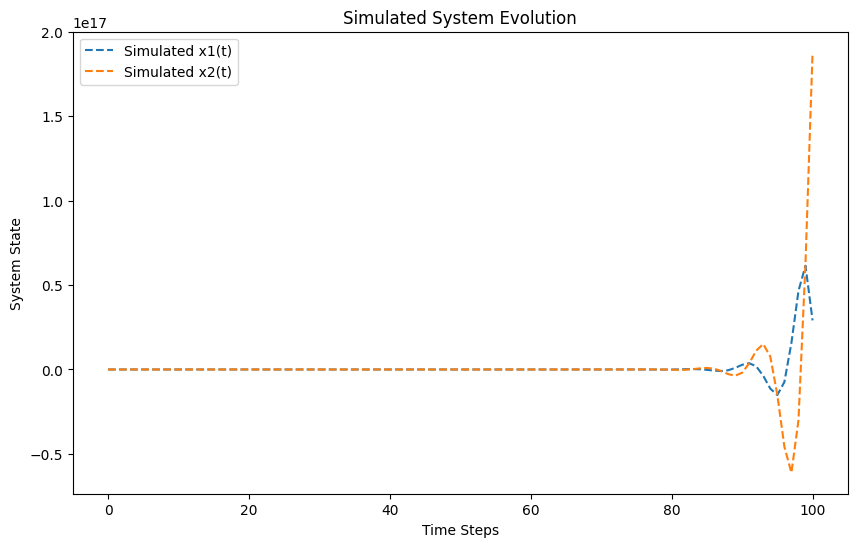

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
X = pd.read_csv('/content/hw2-ID-X.csv', header=None).values  # System states x(t)
X_prime = pd.read_csv('/content/hw2-ID-Xprime.csv', header=None).values  # Derivatives x'(t)

# Check the shapes of the data
print(X.shape)
print(X_prime.shape)

# Define the input (state) and output (derivative) for the regression
X_input = X
y_output = X_prime

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_input, y_output)

# The coefficients of the linear model (A matrix for linear systems)
A = regressor.coef_
b = regressor.intercept_

print("Identified coefficients:", A)
print("Intercept (bias term):", b)

# Simulate the system based on the identified model
def simulate_system(A, b, X_initial, time_steps=100):
    x = X_initial
    states = [x]

    for t in range(time_steps):
        x_prime = np.dot(A, x) + b
        x = x + x_prime
        states.append(x)

    return np.array(states)

# Initial condition (for example, take the first state from the dataset)
X_initial = X[0]

# Simulate the system
simulated_states = simulate_system(A, b, X_initial)

# Plot the simulated evolution of the system
plt.figure(figsize=(10, 6))
plt.plot(simulated_states[:, 0], label='Simulated x1(t)', linestyle='dashed')
plt.plot(simulated_states[:, 1], label='Simulated x2(t)', linestyle='dashed')
plt.title("Simulated System Evolution")
plt.xlabel("Time Steps")
plt.ylabel("System State")
plt.legend()
plt.show()


In [11]:
#Plot Comparing Evolution

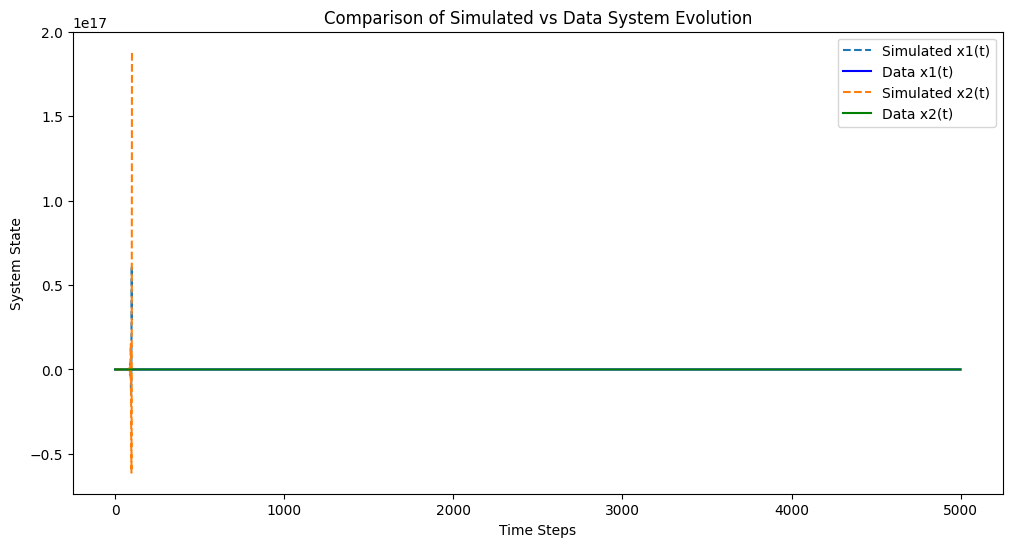

In [9]:
# Plot comparing the evolution of the system with the data
plt.figure(figsize=(12, 6))
plt.plot(simulated_states[:, 0], label='Simulated x1(t)', linestyle='dashed')
plt.plot(X[:, 0], label='Data x1(t)', color='blue')
plt.plot(simulated_states[:, 1], label='Simulated x2(t)', linestyle='dashed')
plt.plot(X[:, 1], label='Data x2(t)', color='green')

plt.title("Comparison of Simulated vs Data System Evolution")
plt.xlabel("Time Steps")
plt.ylabel("System State")
plt.legend()
plt.show()
